<a href="https://colab.research.google.com/github/misspriyanshigupta-ctrl/Projects/blob/main/UFUsed_Bike_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Columns:
● model_name: Name of the bike model
● model_year: Year the model was manufactured
● kms_driven: Kilometers driven by the bike
● owner: Owner category (first, second, etc.)
● location: City or region of the sale
● mileage: Fuel efficiency of the bike
● power: Power rating of the bike
● price: Selling price of the bike (target variable)
● cc: Engine capacity in cubic centimeters
● brand: Brand of the bike

### Import necessary libraries


In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

### Load the dataset


In [2]:
from google.colab import files
uploaded = files.upload()


Saving bikes.csv to bikes.csv


### Explore the dataset

In [3]:
data = pd.read_csv('bikes.csv')

# Explore the dataset

In [4]:
print(data.head())


                         model_name  model_year      kms_driven        owner  \
0     Bajaj Avenger Cruise 220 2017        2017        17000 Km  first owner   
1  Royal Enfield Classic 350cc 2016        2016        50000 Km  first owner   
2               Hyosung GT250R 2012        2012        14795 Km  first owner   
3        Bajaj Dominar 400 ABS 2017        2017  Mileage 28 Kms  first owner   
4             Jawa Perak 330cc 2020        2020         2000 Km  first owner   

      location       mileage      power   price  
0    hyderabad  \n\n 35 kmpl     19 bhp   63500  
1    hyderabad  \n\n 35 kmpl  19.80 bhp  115000  
2    hyderabad  \n\n 30 kmpl     28 bhp  300000  
3  pondicherry   \n\n 28 Kms  34.50 bhp  100000  
4    bangalore         \n\n      30 bhp  197500  


Data Cleaning
○ Missing Values: Identify and handle missing values.
○ Duplicates: Check and remove any duplicate rows.
○ Inconsistent Data: Address inconsistencies like typos or irregular
formats in location or owner.




In [5]:
data.isna().sum()

,0
model_name,0
model_year,0
kms_driven,0
owner,0
location,19
mileage,11
power,31
price,0


CC from Model name
From the model name, following can be extracted :

● CC of the bike
● Brand and Model name

In [6]:
cc = []
for veh in data.model_name:
    models_processed = " ".join(veh.split(" ")[:-1]).lower() # Remove year, make lowercase and handle cases like "220cc"

    match_cc = re.search(r'([0-9]+cc)', models_processed, flags=re.I)
    if match_cc:
        extracted_cc = match_cc.group(1)
        cc.append(extracted_cc)
    elif "hyosung" in models_processed:
        cc.append(models_processed) # Append the whole processed name for Hyosung
    else:
        cc.append(models_processed) # Append the whole processed name if no cc and not Hyosung

Few entries require manual processing because of their different naming convention
and non availability of engine cc information in their naming

In [7]:
for i in range(len(cc)):
    if "1000" in cc[i]:
        cc[i] = "1000cc"

    elif "310" in cc[i]:
        cc[i] = "310cc"
    elif "apache rtr 200" in cc[i]:
        cc[i] = "200cc"
    elif "ns200" in cc[i]:
        cc[i] = "200cc"
    elif "rs200" in cc[i]:
        cc[i] = "200cc"
    elif "220" in cc[i]:
        cc[i] = "220cc"
    elif "400" in cc[i]:
        cc[i] = "400cc"
    elif "250" in cc[i]:
        cc[i] = "250cc"
    elif "125" in cc[i]:
        cc[i] = "125cc"
    elif "160" in cc[i]:
        cc[i] = "160cc"
    elif "150" in cc[i]:
        cc[i] = "150cc"
    elif "350" in cc[i]:
        cc[i] = "350cc"
    elif "200" in cc[i]:
        cc[i] = "200cc"
    elif "100" in cc[i]:
        cc[i] = "100cc"
    elif "180" in cc[i]:
        cc[i] = "180cc"
    elif "110" in cc[i]:
        cc[i] = "110cc"
    elif "390" in cc[i]:
        cc[i] = "390cc"
    elif "135" in cc[i]:
        cc[i] = "135cc"
    elif "r15" in cc[i]:
        cc[i] = "150cc"
    elif "650" in cc[i]:
        cc[i] = "650cc"
    elif "750" in cc[i]:
        cc[i] = "750cc"
    elif "800" in cc[i]:
        cc[i] = "800cc"
    elif "300" in cc[i]:
        cc[i] = "300cc"
    elif "765" in cc[i]:
        cc[i] = "765cc"
    elif "883" in cc[i]:
        cc[i] = "883cc"
    elif "797" in cc[i]:
        cc[i] = "797cc"

    elif "810" in cc[i]:
        cc[i] = "810cc"
    elif "321" in cc[i]:
        cc[i] = "321cc"
    elif "821" in cc[i]:
        cc[i] = "821cc"
    elif "120" in cc[i]:
        cc[i] = "120cc"
    elif "1745" in cc[i]:
        cc[i] = "1745cc"
    elif "899" in cc[i]:
        cc[i] = "899cc"
    elif "900" in cc[i]:
        cc[i] = "900cc"
    elif "302" in cc[i]:
        cc[i] = "302cc"
    elif "959" in cc[i]:
        cc[i] = "959cc"
    elif "600" in cc[i]:
        cc[i] = "600cc"
    elif "502" in cc[i]:
        cc[i] = "502cc"
    elif "um renegade" in cc[i]:
        cc[i] = "279cc"
    elif "hero splendor" in cc[i]:
        cc[i] = "97cc"
    elif "hero passion plus" in cc[i]:
        cc[i] = "97cc"
    elif "yamaha fz" in cc[i]:
        cc[i] = "150cc"
    elif "honda hornet" in cc[i]:
        cc[i] = "184cc"
    elif "royal enfield interceptor" in cc[i]:
        cc[i] = "650cc"
    elif "hero passion pro" in cc[i]:
        cc[i] = "113cc"
    elif "hero passion xpro" in cc[i]:
        cc[i] = "109cc"
    elif "harley-davidson street bob" in cc[i]:
        cc[i] = "1868cc"
    elif "harley-davidson fat bob" in cc[i]:
        cc[i] = "1868cc"
    elif "harley-davidson fat boy" in cc[i]:
        cc[i] = "1868cc"
    elif "harley-davidson street rod" in cc[i]:
        cc[i] = "749cc"
    elif "zx-10r" in cc[i]:
        cc[i] = "1000cc"
    elif "rsv4" in cc[i]:
        cc[i] = "1099cc"

    elif "tvs sport" in cc[i]:
        cc[i] = "109cc"
    elif "tvs star city" in cc[i]:
        cc[i] = "109cc"
    elif "harley-davidson superlow" in cc[i]:
        cc[i] = "883cc"
    elif "harley-davidson roadster" in cc[i]:
        cc[i] = "1202cc"
    elif "harley-davidson forty eight" in cc[i]:
        cc[i] = "1202cc"
    elif "harley-davidson night rod special" in cc[i]:
        cc[i] = "1247cc"
    elif "triumph rocket iii roadster" in cc[i]:
        cc[i] = "2458cc"
    elif "triumph thunderbird lt" in cc[i]:
        cc[i] = "1699cc"
    elif "kawasaki vulcan s black" in cc[i]:
        cc[i] = "649cc"
    elif "mahindra mojo black pearl" in cc[i]:
        cc[i] = "300cc"
    elif "ducati diavel carbon" in cc[i]:
        cc[i] = "1198cc"
    elif "triumph tiger explorer" in cc[i]:
        cc[i] = "1215cc"
    elif "royal enfield continental" in cc[i]:
        cc[i] = "650cc"
    elif "triumph street triple s" in cc[i]:
        cc[i] = "765cc"
    elif "harley-davidson breakout" in cc[i]:
        cc[i] = "1868cc"
    elif "harley-davidson cvo" in cc[i]:
        cc[i] = "1923cc"

Remove the CC from names and convert all to integer

In [8]:
cc[cc.index('hero karizma 223 cc')] = '223cc'
cc = [int(i.replace('cc','')) for i in cc]

In [9]:
data['cc'] = cc
data

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,220
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,350
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,250
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,400
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,330
...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000,150
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000,100
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740,180
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000,150


Split the model name by spaces and take first split as the brand name


In [10]:
np.unique([i.split()[0] for i in data.model_name])

array(['Aprilia', 'BMW', 'Bajaj', 'Benelli', 'BenelliImperiale', 'Ducati',
       'Fb', 'Harley-Davidson', 'Hero', 'Honda', 'Husqvarna', 'Hyosung',
       'Ideal', 'Indian', 'Jawa', 'KTM', 'Kawasaki', 'MV', 'Mahindra',
       'Moto', 'Royal', 'Suzuki', 'TVS', 'Triumph', 'UM', 'Yamaha',
       'Yazdi', 'yamaha'], dtype='<U16')

Benelli has inconsistent naming convetion shows repeating values. Preprocess them
to generate spacing between brand and model name

In [11]:
data[data.model_name.str.contains("BenelliImperiale") > 0]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc
2809,BenelliImperiale 400 BS6 2020,2020,2800 Km,first owner,mumbai,\n\n 35 kmpl,20.7 bhp,207500,400
2978,BenelliImperiale 400 2020,2020,1500 Km,first owner,mumbai,\n\n,20.7 bhp,207500,400
2979,BenelliImperiale 400 2020,2020,3500 Km,first owner,mumbai,\n\n,20.7 bhp,206462,400
4177,BenelliImperiale 400 2020,2020,3500 Km,first owner,mumbai,\n\n,20.7 bhp,220000,400
4399,BenelliImperiale 400 2020,2020,7700 Km,first owner,bangalore,\n\n,20.7 bhp,220000,400
5177,BenelliImperiale 400 2020,2020,1900 Km,first owner,secunderabad,\n\n,20.7 bhp,240000,400


In [12]:
data.model_name.replace('BenelliImperiale 400 2020','BenelliImperiale 400 2020',inplace=True)
data.model_name.replace('BenelliImperiale 400 BS62020','Benelli Imperiale 400 BS6 2020',inplace=True)

In [13]:
data[data.model_name.str.contains("Benelli") > 0]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc
1651,Benelli 302R 300CC 2017,2017,11000 Km,first owner,bangalore,\n\n,38.26 bhp,230000,300
1668,Benelli 302R 300CC 2018,2018,23933 Km,first owner,bangalore,\n\n,38.26 bhp,270000,300
1926,Benelli 302R 300CC 2018,2018,15025 Km,second owner,mumbai,\n\n,38.26 bhp,240000,300
1939,Benelli Leoncino 500cc 2019,2019,3300 Km,first owner,delhi,\n\n,46.8 bhp,435262,500
2140,Benelli TNT 300 ABS 2020,2020,4500 Km,first owner,delhi,\n\n 25 kmpl,37.73 bhp,295000,300
2307,Benelli TNT 300 2017,2017,10000 Km,first owner,mumbai,\n\n 25 kmpl,37.73 bhp,259375,300
2420,Benelli TNT 300 ABS 2020,2020,13000 Km,first owner,belgaum,\n\n 25 kmpl,37.73 bhp,315000,300
2435,Benelli TNT 899 2015,2015,3174 Km,first owner,jajpur,\n\n 17 kmpl,119.37 bhp,569400,899
2554,Benelli 302R 300CC 2019,2019,12000 Km,first owner,ranchi,\n\n,38.26 bhp,269000,300
2652,Benelli TNT 600 GT 2016,2016,11000 Km,first owner,chandigarh,\n\n 19 kmpl,82.70 bhp,497000,600


Extracing Brand from model name

In [14]:
brands = [i.split()[0] for i in data.model_name]
data['brand'] = brands

In [15]:
data

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500,220,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000,250,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000,400,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500,330,Jawa
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,\n\n 42 kmpl,16 bhp,55000,150,Yamaha
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,\n\n 80 Kmpl,7.7,28000,100,Bajaj
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,\n\n 65 kmpl,17 bhp,61740,180,Bajaj
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,\n\n 57 kmpl,11.80 bhp,49000,150,Bajaj


In [16]:
data.replace('Ideal',"Jawa",inplace=True)
data.replace("yamaha","Yamaha",inplace=True)

In [17]:
mil = data.mileage.to_list()
mil = [str(i).lower().replace('kmpl','').split("-")[0] for i in
mil ]
mil = [str(i).lower().replace('kms','') for i in mil ]
mil = [str(i).replace('\n','') for i in mil ]
mil = [str(i).strip() for i in mil]
data.mileage = mil

In [18]:
data[data.mileage == 'liquid cooled']

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
157,Jawa Forty Two 295CC 2019,2019,4930 Km,first owner,moradabad,liquid cooled,27 bhp,140000,295,Jawa
211,Jawa Forty Two 295CC Dual ABS BS6 2020,2020,5000 Km,first owner,pune,liquid cooled,27 bhp,190000,295,Jawa
300,Jawa Forty Two 295CC 2019,2019,600 Km,first owner,ludhiana,liquid cooled,27 bhp,162000,295,Jawa
347,Jawa Forty Two 295CC 2019,2019,3200 Km,first owner,ghaziabad,liquid cooled,27 bhp,160000,295,Jawa
549,Jawa Forty Two Dual ABS 295CC 2020,2020,419 Km,first owner,chennai,liquid cooled,27 bhp,165000,295,Jawa
656,Jawa Forty Two 295CC 2019,2019,1800 Km,first owner,nagpur,liquid cooled,27 bhp,142000,295,Jawa
668,Jawa Standard 295CC ABS BS6 2020,2020,3000 Km,first owner,rajkot,liquid cooled,27 bhp,167000,295,Jawa
699,Jawa Standard 295CC Dual ABS BS6 2020,2020,2700 Km,first owner,mumbai,liquid cooled,27 bhp,160000,295,Jawa
775,Jawa Forty Two Dual ABS 295CC 2020,2020,1700 Km,first owner,allahabad,liquid cooled,27 bhp,220000,295,Jawa
815,Jawa Forty Two 295CC 2019,2019,11500 Km,first owner,madurai,liquid cooled,27 bhp,170000,295,Jawa


In [19]:
data.replace('liquid cooled','37.6',inplace=True)

In [20]:
np.unique(data.mileage)

array(['', '104', '12', '12.5', '13', '14', '15', '16', '17', '17.85',
       '18', '18.86', '19', '20', '20.3', '20.40', '21', '22', '23', '25',
       '26', '27', '28', '29', '30', '31.85', '32', '35', '37', '37.6',
       '38', '38.5', '39.1', '39.4', '40', '42', '43', '45', '45.8',
       '46.40', '48', '5', '50', '52', '53', '53.72', '54', '55', '55.47',
       '56', '57', '58', '59', '60', '62', '63', '63.97', '64', '65',
       '67', '68', '69', '70', '71', '72', '74', '75', '77', '80', '81',
       '82', '82.4', '83', '84', '85', '89', '90', '95', '96.9', 'nan'],
      dtype=object)

In [21]:
data[data.mileage == 'nan']

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
144,TVS Apache RTR 160cc 2014,2014,20372 Km,first owner,delhi,nan,15.2 bhp @ 8500 rpm,42000,160,TVS
193,Hero Karizma R 223cc 2010,2010,70000 Km,first owner,noida,nan,"17 bhp @ 7,000 rpm",19215,223,Hero
422,TVS Apache 150cc 2007,2007,36486 Km,second owner,bathinda,nan,13.7 Bhp @ 8500 rpm,19500,150,TVS
1376,KTM RC 390cc 2015,2015,28000 Km,second owner,hyderabad,nan,"43 bhp @ 9,000 rpm",130000,390,KTM
1488,Royal Enfield Thunderbird 350cc 2015,2015,24000 Km,first owner,bangalore,nan,"19.80 bhp @ 5,250 rpm",115000,350,Royal
1640,Kawasaki Ninja 650cc 2020,2020,8000 Km,second owner,delhi,nan,"66.4 bhp @ 8,000 rpm",520000,650,Kawasaki
2160,Harley-Davidson Street Rod 2019,2019,600 Km,first owner,bangalore,nan,70 bhp,700700,749,Harley-Davidson
2277,KTM Duke 200cc 2012,2012,30000 Km,first owner,bangalore,nan,"25 bhp @ 10,000 rpm",85000,200,KTM
4646,Hero Passion Pro 100cc 2014,2014,16834 Km,first owner,chandigarh,nan,8.2 Bhp @ 8000 rpm,40000,100,Hero
4655,Bajaj Pulsar 180cc 2013,2013,82000 Km,first owner,chandigarh,nan,"15 bhp @ 9,000 rpm",40000,180,Bajaj


Mileage values taken from internet

In [22]:
data.iloc[144,data.columns.get_loc('mileage')] = "54"
data.iloc[193,data.columns.get_loc('mileage')] = "45"
data.iloc[422,data.columns.get_loc('mileage')] = "62"
data.iloc[1376,data.columns.get_loc('mileage')] = "25"
data.iloc[1488,data.columns.get_loc('mileage')] = "40"
data.iloc[1640,data.columns.get_loc('mileage')] = "25"
data.iloc[2160,data.columns.get_loc('mileage')] = "18"
data.iloc[2277,data.columns.get_loc('mileage')] = "35"
data.iloc[4646,data.columns.get_loc('mileage')] = "65"
data.iloc[4655,data.columns.get_loc('mileage')] = "45"
data.iloc[7394,data.columns.get_loc('mileage')] = "40"

Few entires have just an empty string as the input. Replace them to 0 and further
modify it as teh average mileage of that brand bikes.

In [23]:
data.replace('','0',inplace=True)

In [24]:
null_brands = np.unique(data[data.mileage == '0'].brand)
for brand in null_brands:
    values = data[data.brand == brand].mileage.to_numpy()
    values = np.delete(values,np.where(values == '0'))

    if(len(values) == 0):
        print(brand)
        mean=0
    else:
         mean = values.astype("float32").mean()

    for index,rows in data[data.brand == brand].iterrows():
        if data.iloc[index,data.columns.get_loc("mileage")] == '0':
            data.iloc[index,data.columns.get_loc("mileage")] = str(mean)

BMW
Fb
Yazdi


Few values have no mileage given to taken mean, so input them manually - values
taken from internet.

In [25]:
data.iloc[2023,data.columns.get_loc("mileage")] = "30"
data.iloc[2832,data.columns.get_loc("mileage")] = "30"
data.iloc[3400,data.columns.get_loc("mileage")] = "30"
data.iloc[3827,data.columns.get_loc("mileage")] = "30"

data.iloc[4154,data.columns.get_loc("mileage")] = "30"
data.iloc[4392,data.columns.get_loc("mileage")] = "30"
data.iloc[5435,data.columns.get_loc("mileage")] = "30"
data.iloc[5586,data.columns.get_loc("mileage")] = "17"
data.iloc[5727,data.columns.get_loc("mileage")] = "30"
data.iloc[6561,data.columns.get_loc("mileage")] = "30"

In [26]:
data.iloc[3773,data.columns.get_loc("mileage")] = "26"
data.iloc[5031,data.columns.get_loc("mileage")] = "26"

In [27]:
data.iloc[5584,data.columns.get_loc("mileage")] = "35"

Preprocessing Location
Replace missing location entries with mode values

In [28]:
for index,rows in data[data.location.isna()].iterrows():
    data.iloc[index,data.columns.get_loc("location")] = data[data.brand == rows.brand].dropna().location.mode()

Preprocessing Vehicle Power

In [29]:
val= data.power.isna()
np.where(val == True)

(array([ 135, 1627, 1691, 1716, 2442, 2487, 2638, 2659, 2714, 2819, 3088,
        3977, 4393, 4425, 4591, 4760, 5626, 5673, 5694, 5788, 5950, 6155,
        6321, 6781, 6853, 7306, 7442, 7513, 7783, 7796, 7801]),)

Few power entries does not have any value - enter them manually using values from
internet.

In [30]:
data.iloc[135,data.columns.get_loc("power")] = "28"
data.iloc[1627,data.columns.get_loc("power")] = "14"
data.iloc[1691,data.columns.get_loc("power")] = "18"
data.iloc[1716,data.columns.get_loc("power")] = "18"
data.iloc[2442,data.columns.get_loc("power")] = "87"
data.iloc[2487,data.columns.get_loc("power")] = "18"
data.iloc[2638,data.columns.get_loc("power")] = "16"

data.iloc[2659,data.columns.get_loc("power")] = "64"
data.iloc[2714,data.columns.get_loc("power")] = "18"
data.iloc[2819,data.columns.get_loc("power")] = "87"
data.iloc[3088,data.columns.get_loc("power")] = "18"
data.iloc[3977,data.columns.get_loc("power")] = "37.5"
data.iloc[4393,data.columns.get_loc("power")] = "18"
data.iloc[4425,data.columns.get_loc("power")] = "111"
data.iloc[4591,data.columns.get_loc("power")] = "75.1"
data.iloc[4760,data.columns.get_loc("power")] = "18"
data.iloc[5626,data.columns.get_loc("power")] = "65"
data.iloc[5673,data.columns.get_loc("power")] = "89.2"
data.iloc[5694,data.columns.get_loc("power")] = "64"
data.iloc[5788,data.columns.get_loc("power")] = "11"
data.iloc[5950,data.columns.get_loc("power")] = "26.21"
data.iloc[6155,data.columns.get_loc("power")] = "15.2"
data.iloc[6321,data.columns.get_loc("power")] = "26.21"
data.iloc[6781,data.columns.get_loc("power")] = "28.15"
data.iloc[6853,data.columns.get_loc("power")] = "15.2"
data.iloc[7306,data.columns.get_loc("power")] = "10.70"
data.iloc[7442,data.columns.get_loc("power")] = "7.4"
data.iloc[7513,data.columns.get_loc("power")] = "23.17"
data.iloc[7783,data.columns.get_loc("power")] = "24.13"
data.iloc[7796,data.columns.get_loc("power")] = "7.4"
data.iloc[7801,data.columns.get_loc("power")] = "8.24"

Resolve inconsistent naming conventions in power column by removing character
values like units -bhp, kw, ps etc. Similarly, few entries are in different units - Kw and
PS, convert them to bhp for consistency

In [31]:
for index,rows in data.iterrows():
    if "bhp" in str(data.iloc[index,data.columns.get_loc("power")]).lower():
        data.iloc[index,data.columns.get_loc("power")] = \
            str(data.iloc[index,data.columns.get_loc("power")]).replace("bhp",'')
    if "hp" in str(data.iloc[index,data.columns.get_loc("power")]).lower():
        data.iloc[index,data.columns.get_loc("power")] = \
            float(str(data.iloc[index,data.columns.get_loc("power")]).split(" ")[0].replace("hp"," ").split("-")[0]) * 0.986
    if "kw" in str(data.iloc[index,data.columns.get_loc("power")]).lower():
        data.iloc[index,data.columns.get_loc("power")] = \
            float(str(data.iloc[index,data.columns.get_loc("power")]).split(" ")[0].lower().replace("kw","")) * 1.341
    if "ps" in str(data.iloc[index,data.columns.get_loc("power")]).lower():
        data.iloc[index,data.columns.get_loc("power")] = \
            float(str(data.iloc[index,data.columns.get_loc("power")]).split(" ")[0].lower().replace("ps","")) * 0.99
    if "@" in str(data.iloc[index,data.columns.get_loc("power")]).lower():
        data.iloc[index,data.columns.get_loc("power")] = \
            str(data.iloc[index,data.columns.get_loc("power")]).split("@")[0].strip()

In [32]:
data.isna().sum()

,0
model_name,0
model_year,0
kms_driven,0
owner,0
location,0
mileage,0
power,0
price,0
cc,0
brand,0


Preprocessing KMS driven

In [33]:
data

,model_name,model_year,kms_driven,owner,location,mileage,power,price,cc,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35,19,63500,220,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35,19.80,115000,350,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30,28,300000,250,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28,34.50,100000,400,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,37.599995,30,197500,330,Jawa
...,...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,42,16,55000,150,Yamaha
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,80,7.7,28000,100,Bajaj
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,65,17,61740,180,Bajaj
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,57,11.80,49000,150,Bajaj


Distance driven is represented as a string with units. Remove the units and keep only
the distance value.

In [34]:
kms = data.kms_driven.to_numpy()
for i in range(len(kms)):
    kms[i] = kms[i].split(" ")[0]

There are inconsistent entries within the kms_drive column - few are given as
mileage value and otheres are just "yes" strinngs. Replace them with average
distance driven for a standard used bike.

In [35]:
for i in range(len(kms)):
    if str(kms[i]).lower() in ["mileage","yes"]:
        kms[i] = np.nan

data['kms_driven'] = kms
# Convert kms_driven to numeric, coercing errors to NaN
data['kms_driven'] = pd.to_numeric(data['kms_driven'], errors='coerce')

mean = data['kms_driven'].mean()
data['kms_driven'] = data['kms_driven'].fillna(value=mean)

Depending on column, cast each one to respective data type like float, int or string.

In [36]:
data.isna().sum()

,0
model_name,0
model_year,0
kms_driven,0
owner,0
location,0
mileage,0
power,0
price,0
cc,0
brand,0


In [37]:
data = data.astype({"model_name" : str,
"model_year" : int,
"kms_driven" : int,
"owner" : str,
"location" : str,
"mileage" : float,
"power" : float,
"price" : int,
"cc" : int,
"brand" : str})

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  7857 non-null   object 
 1   model_year  7857 non-null   int64  
 2   kms_driven  7857 non-null   int64  
 3   owner       7857 non-null   object 
 4   location    7857 non-null   object 
 5   mileage     7857 non-null   float64
 6   power       7857 non-null   float64
 7   price       7857 non-null   int64  
 8   cc          7857 non-null   int64  
 9   brand       7857 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 614.0+ KB


Exploratory Data Analysis
Statistics

In [39]:
pd.set_option("display.float",str)
data.describe().drop(["model_year"],axis=1).round(2)

,kms_driven,mileage,power,price,cc
count,7857.0,7857.0,7857.0,7857.0,7857.0
mean,23090.09,44.69,20.83,106791.34,254.08
std,24813.44,16.41,15.09,138926.12,182.84
min,0.0,5.0,7.0,0.0,97.0
25%,11204.0,35.0,14.0,42000.0,150.0
50%,23090.0,40.0,19.0,75000.0,200.0
75%,25000.0,55.0,23.86,125000.0,350.0
max,1000000.0,104.0,197.3,3000000.0,2458.0


Text(0, 0.5, 'Count')

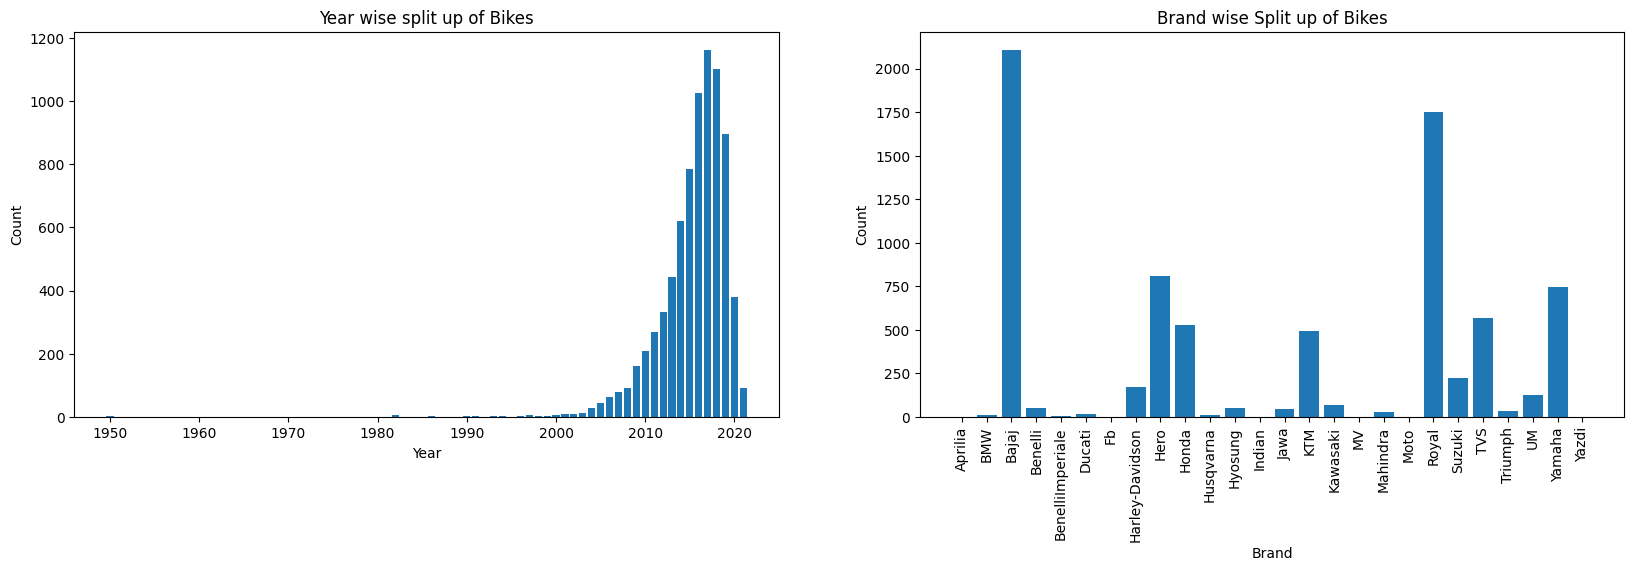

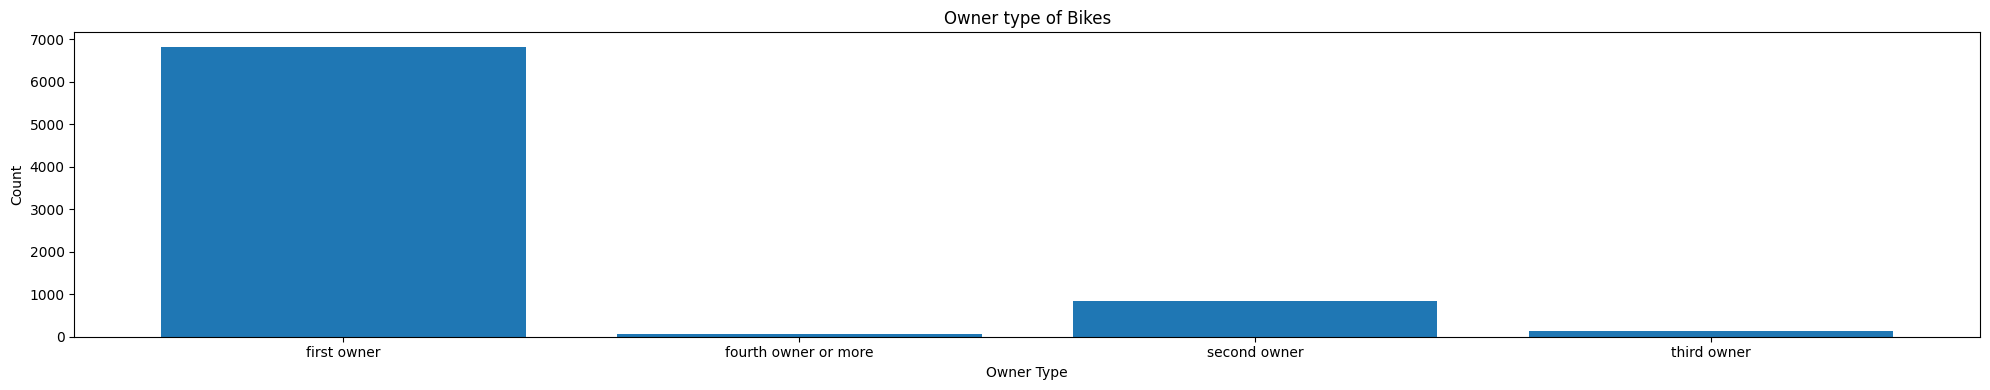

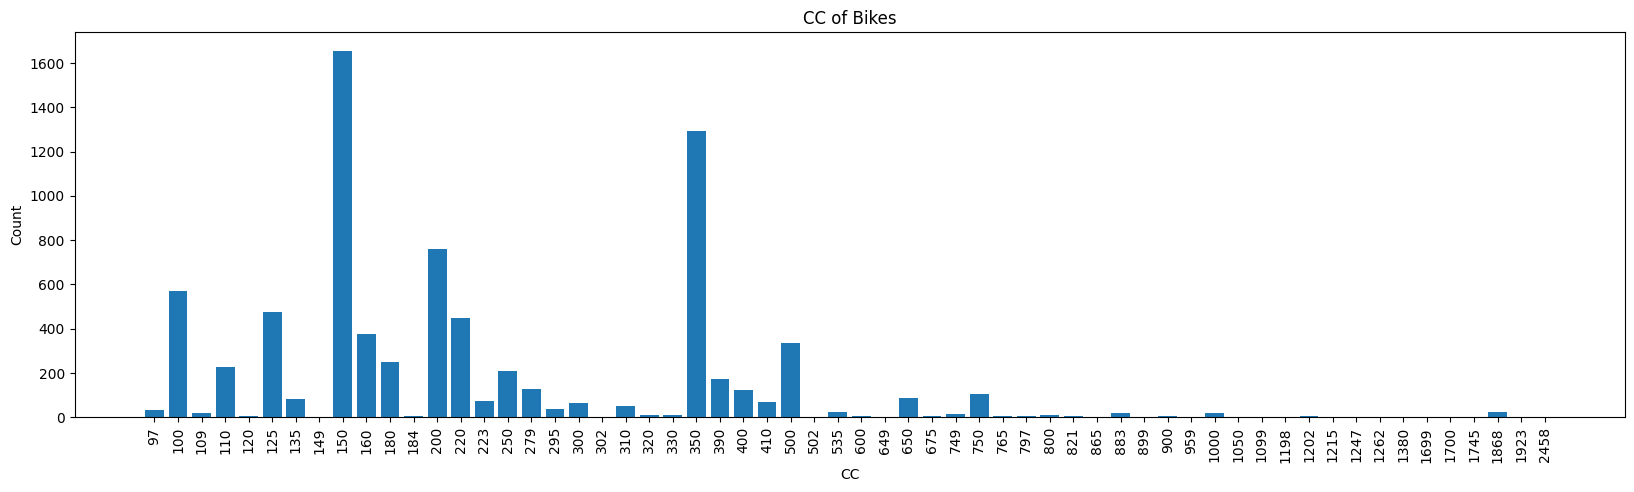

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
x,count = np.unique(data.model_year,return_counts=True)
plt.bar(x,count)
plt.title("Year wise split up of Bikes")
plt.xlabel("Year")
plt.ylabel("Count")

plt.subplot(1,2,2)
x,count = np.unique(data.brand,return_counts=True)
plt.bar(x,count)
plt.title("Brand wise Split up of Bikes")
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.ylabel("Count")

plt.figure(figsize=(20,4))
x,count = np.unique(data.owner,return_counts=True)
plt.bar(x,count)
plt.title("Owner type of Bikes")
plt.xlabel("Owner Type")
plt.ylabel("Count")
plt.tight_layout()

plt.figure(figsize=(20,5))
x,count = np.unique(data.cc,return_counts=True)
plt.bar([str(i) for i in x],count)
plt.title("CC of Bikes")
plt.xlabel("CC")
plt.xticks(rotation=90)
plt.ylabel("Count")